# Importer des bibliothèques

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Charger le fichier CSV

In [13]:
df = pd.read_csv(r"C:\Users\anass\OneDrive\Bureau\airbnb\reviews_LA.csv")

# EDA

In [14]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,8941071,68391055,2016-04-04,10164333,Smruti,"Danielle was a great host, she was extremely r..."
1,8941071,153719836,2017-05-21,97944097,Rob,The apartment was great for us to spend the we...
2,8941071,147589354,2017-04-27,4123723,Widya,"Danielle is a great host, very concerned with..."
3,8941071,145742425,2017-04-19,1459499,Darian,Great location and spacious. Danielle's place ...
4,8941071,144400833,2017-04-15,98494277,Charlie,"Danielle's place was as expected, really good ..."


In [15]:
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
1532920,837764720715019063,882048452895718293,2023-05-01,61709926,Xana,Alexis and David were incredible hosts - frien...
1532921,837764720715019063,866817204898142401,2023-04-10,20783675,Priscila,Such an amazing and beautiful place! David and...
1532922,837764720715019063,864618654800651449,2023-04-07,407565907,Petra,The owners were very kind and helpful. Beautif...
1532923,837764720715019063,850814630932374093,2023-03-19,129150527,Mike,"Beautiful space and view, very friendly hosts,..."
1532924,837764720715019063,966053148646013086,2023-08-25,19046935,Lorenzo,"Posto bellissimo, cottage molto carino con vis..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532925 entries, 0 to 1532924
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1532925 non-null  int64 
 1   id             1532925 non-null  int64 
 2   date           1532925 non-null  object
 3   reviewer_id    1532925 non-null  int64 
 4   reviewer_name  1532925 non-null  object
 5   comments       1532639 non-null  object
dtypes: int64(3), object(3)
memory usage: 70.2+ MB


#  Creation d'une fonction pour obtenir le sentiment

In [17]:
def get_sentiment(text):
    if isinstance(text, float):
        # Si c'est une valeur manquante, retournez 'Neutre' (ou ajustez selon vos besoins)
        return 'Neutre'
    
    analysis = TextBlob(str(text))
    # Vous pouvez ajuster ces seuils en fonction de vos besoins
    if analysis.sentiment.polarity > 0:
        return 'Positif'
    elif analysis.sentiment.polarity < 0:
        return 'Négatif'
    else:
        return 'Neutre'


In [18]:
# Appliquer la fonction de sentiment à chaque commentaire
df['Sentiment'] = df['comments'].apply(get_sentiment)

# Afficher le résultat
print(df[['comments', 'Sentiment']])


                                                  comments Sentiment
0        Danielle was a great host, she was extremely r...   Positif
1        The apartment was great for us to spend the we...   Positif
2        Danielle is a great host, very concerned  with...   Positif
3        Great location and spacious. Danielle's place ...   Positif
4        Danielle's place was as expected, really good ...   Positif
...                                                    ...       ...
1532920  Alexis and David were incredible hosts - frien...   Positif
1532921  Such an amazing and beautiful place! David and...   Positif
1532922  The owners were very kind and helpful. Beautif...   Positif
1532923  Beautiful space and view, very friendly hosts,...   Positif
1532924  Posto bellissimo, cottage molto carino con vis...    Neutre

[1532925 rows x 2 columns]


# Compteur du nombre de commentaires par sentiment 

In [26]:
sentiment_counts = df['Sentiment'].value_counts()

# Afficher les résultats de manière détaillée
print("Nombre de commentaires positifs:", sentiment_counts['Positif'])
print("Nombre de commentaires négatifs:", sentiment_counts['Négatif'])
print("Nombre de commentaires neutres:", sentiment_counts['Neutre'])


Nombre de commentaires positifs: 1432522
Nombre de commentaires négatifs: 18760
Nombre de commentaires neutres: 81643


# Créer un graphique à barres

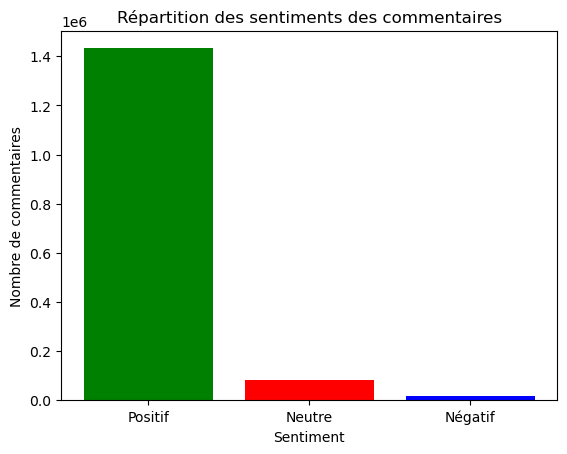

In [20]:
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Répartition des sentiments des commentaires')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
plt.show()

# TextBLOD testeur 

In [30]:
from textblob import TextBlob

def analyser_sentiment(commentaire):
    # Créer un objet TextBlob
    blob = TextBlob(commentaire)

    # Analyser le sentiment
    sentiment = blob.sentiment.polarity

    # Catégoriser le sentiment
    if sentiment > 0:
        return "Positif"
    elif sentiment < 0:
        return "Négatif"
    else:
        return "Neutre"

# Exemple d'utilisation
commentaire_utilisateur = input("Entrez votre commentaire : ")
resultat_sentiment = analyser_sentiment(commentaire_utilisateur)
print(f"Sentiment du commentaire : {resultat_sentiment}")


Entrez votre commentaire : happy
Sentiment du commentaire : Positif
